Incremental

In [1]:
def incr_search(maze, target, start_point=(1,1), _debug=False)
# create the main structure - a list of paths.  Start with one, that has one point at 0,0
paths = [[start_point]]
target_found = False

# go through paths repeatedly, extending by 1 where paths are open, adding new paths where there are choices
while not target_found:
    
    # iterate over paths
    for path in paths:
        

In [14]:
import numpy as np
import matplotlib.pyplot as pyplot
from importlib import reload
import maze

In [88]:
reload(maze)
maze.incr_search(m1, (4,7), _debug=False)

seen:  {(1, 1)}
Selecting head:  (1, 1)
paths after an iteration
[(1, 1), (1, 2)]
[(1, 1), (2, 1)]
seen:  {(1, 1)}
Selecting head:  (1, 2)
seen:  {(1, 2), (1, 1)}
Selecting head:  (2, 1)
paths after an iteration
[(1, 1), (1, 2), (2, 1)]
[(1, 1), (2, 1), (3, 2)]
seen:  {(1, 2), (1, 1), (2, 1)}
Selecting head:  (2, 1)
seen:  {(1, 2), (1, 1), (2, 1)}
Selecting head:  (3, 2)
paths after an iteration
[(1, 1), (1, 2), (2, 1), (3, 2)]
[(1, 1), (2, 1), (3, 2), (3, 4)]
seen:  {(1, 2), (3, 2), (1, 1), (2, 1)}
Selecting head:  (3, 2)
seen:  {(1, 2), (3, 2), (1, 1), (2, 1)}
Selecting head:  (3, 4)
paths after an iteration
[(1, 1), (1, 2), (2, 1), (3, 2), (3, 4)]
[(1, 1), (2, 1), (3, 2), (3, 4)]
seen:  {(1, 2), (3, 2), (2, 1), (3, 4), (1, 1)}
Selecting head:  (3, 4)
seen:  {(1, 2), (3, 2), (2, 1), (3, 4), (1, 1)}
Selecting head:  (3, 4)
paths after an iteration
[(1, 1), (1, 2), (2, 1), (3, 2), (3, 4)]
[(1, 1), (2, 1), (3, 2), (3, 4)]
seen:  {(1, 2), (3, 2), (2, 1), (3, 4), (1, 1)}
Selecting head:  

KeyboardInterrupt: 

In [75]:
list(range(5))[:-1]

[0, 1, 2, 3]

In [52]:
aset = {(0,1), (1,2)}
aset

{(0, 1), (1, 2)}

In [63]:
atup = (6,7)

In [64]:
aset.add(atup)
aset

{(0, 1), 1, (1, 2), 3, (6, 7), (2, 8), 'y'}

In [33]:
reload(maze)
maze.get_neighbours((1,1), m1)

(1, 1)
[[ True  True  True  True  True  True  True  True  True]
 [ True False False False False False False False  True]
 [ True False  True  True  True  True  True False  True]
 [ True False False False False False  True False  True]
 [ True False  True  True  True False  True False  True]
 [ True False  True False False False  True False  True]
 [ True False  True  True  True  True  True False  True]
 [ True False  True False False False False False  True]
 [ True False  True False  True  True  True False  True]
 [ True False False False False False False False  True]
 [ True  True  True  True  True  True  True  True  True]]
{'N': True, 'E': False, 'S': False, 'W': True}


{'E': False, 'N': True, 'S': False, 'W': True}

In [ ]:
def maze(width=81, height=51, complexity=.75, density=.75):
    # Only odd shapes`
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    Z = numpy.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = np.random.randint(0, shape[1] // 2) * 2, np.random.randint(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[np.random.randint(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z

In [10]:
m1 = maze(width=8, height=10)
m1

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True, False, False, False, False, False, False, False,  True],
       [ True, False,  True,  True,  True,  True,  True, False,  True],
       [ True, False, False, False, False, False,  True, False,  True],
       [ True, False,  True,  True,  True, False,  True, False,  True],
       [ True, False,  True, False, False, False,  True, False,  True],
       [ True, False,  True,  True,  True,  True,  True, False,  True],
       [ True, False,  True, False, False, False, False, False,  True],
       [ True, False,  True, False,  True,  True,  True, False,  True],
       [ True, False, False, False, False, False, False, False,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

In [31]:
m1[0,0]

True

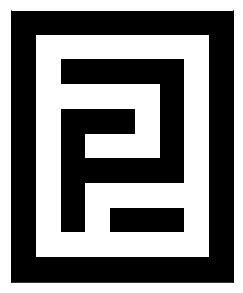

In [11]:
pyplot.figure(figsize=(10, 5))
pyplot.imshow(m1, cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()